# Analyze, identify patterns, and explore the data.

## Interpreting the data

We have two crucial devices inside the cellphone: the accelerometer and the gyroscope.

### Accelerometer

An accelerometer is a device that measures acceleration forces. These forces may be static, like the continuous force of gravity, or dynamic, caused by moving or vibrating the accelerometer.

- **Triaxial Acceleration:** This refers to acceleration measurements along three axes: X, Y, and Z. By combining these three measurements, you get the total acceleration vector.
- **Total Acceleration:** This is the resultant vector magnitude obtained from the three axes' accelerations. It represents the overall acceleration force experienced by the sensor.

$$  \text{Total Acceleration} = \sqrt{(a_x)^2 + (a_y)^2 + (a_z)^2}  $$

- **Estimated Body Acceleration:** This is the component of the total acceleration that is attributed to body movements, excluding the gravitational component. It involves separating the gravity-related acceleration from the dynamic acceleration caused by the body's motion.

### Gyroscope

A gyroscope measures the rate of rotation (angular velocity) around an axis. It helps track orientation and rotational motion.

- **Triaxial Angular Velocity:** Similar to the accelerometer, a gyroscope provides angular velocity measurements along three axes: X, Y, and Z. These values indicate how fast the device is rotating around each axis.

- **Time Domain Variables:** These variables are derived directly from the raw sensor data and represent characteristics like mean, standard deviation, maximum, minimum, etc., of the acceleration and angular velocity signals over time.

- **Frequency Domain Variables:** These variables are obtained by transforming the time-domain signals into the frequency domain using techniques like the Fast Fourier Transform (FFT). Frequency domain analysis helps in understanding the periodic features and frequency components of the signal.

#### For our case

- **Accelerometer:** provides data on how much and in what direction the sensor is accelerating.
- **Gyroscope:** gives data on how the sensor is rotating.

### Data Preprocessing

Using the sensors (Gyroscope and accelerometer) in a smartphone, the following data has been captured:

- **3-axial linear acceleration** (tAcc-XYZ) from the accelerometer
- **3-axial angular velocity** (tGyro-XYZ) from the Gyroscope

**Prefix 't'** denotes time, and **suffix 'XYZ'** represents 3-axial signals in the X, Y, and Z directions.

### Feature Extraction

These sensor signals undergo preprocessing with noise filters and are then sampled in fixed-width windows of 2.56 seconds each, with a 50% overlap (i.e., each window contains 128 readings). From each window, a feature vector is derived by calculating variables from both the time and frequency domains.

Each datapoint in the dataset corresponds to a window with various readings.

### Signal Separation and Derivation

The acceleration signal is separated into Body and Gravity acceleration signals (tBodyAcc-XYZ and tGravityAcc-XYZ) using a low pass filter with a corner frequency of 0.3 Hz. The body linear acceleration and angular velocity are then derived over time to obtain jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ).

### Magnitude Calculation

The magnitude of these 3-dimensional signals is calculated using the Euclidean norm, resulting in features such as:
- tBodyAccMag
- tGravityAccMag
- tBodyAccJerkMag
- tBodyGyroMag
- tBodyGyroJerkMag

### Frequency Domain Signals

Frequency domain signals are obtained from some of the available signals by applying a Fast Fourier Transform (FFT). These signals are labeled with the prefix 'f', similar to the original signals with prefix 't'. Examples include:
- fBodyAcc-XYZ
- fBodyGyroMag

### Summary of Signals

The signals collected and derived are:
- tBodyAcc-XYZ
- tGravityAcc-XYZ
- tBodyAccJerk-XYZ
- tBodyGyro-XYZ
- tBodyGyroJerk-XYZ
- tBodyAccMag
- tGravityAccMag
- tBodyAccJerkMag
- tBodyGyroMag
- tBodyGyroJerkMag
- fBodyAcc-XYZ
- fBodyAccJerk-XYZ
- fBodyGyro-XYZ
- fBodyAccMag
- fBodyAccJerkMag
- fBodyGyroMag
- fBodyGyroJerkMag

### Feature Estimation

From these signals, various properties are estimated, including:

- `mean()`: Mean value
- `std()`: Standard deviation
- `mad()`: Median absolute deviation
- `max()`: Largest value in array
- `min()`: Smallest value in array
- `sma()`: Signal magnitude area
- `energy()`: Energy measure (sum of squares divided by the number of values)
- `iqr()`: Interquartile range
- `entropy()`: Signal entropy
- `arCoeff()`: Autoregression coefficients with Burg order equal to 4
- `correlation()`: Correlation coefficient between two signals
- `maxInds()`: Index of the frequency component with largest magnitude
- `meanFreq()`: Weighted average of the frequency components to obtain a mean frequency
- `skewness()`: Skewness of the frequency domain signal
- `kurtosis()`: Kurtosis of the frequency domain signal
- `bandsEnergy()`: Energy of a frequency interval within the 64 bins of the FFT of each window
- `angle()`: Angle between two vectors

### Vectors

vectors are obtained by averaging signals within a single window sample, which are used in the `angle()` variable:
- gravityMean
- tBodyAccMean
- tBodyAccJerkMean
- tBodyGyroMean
- tBodyGyroJerkMean


## Libraries

In [1]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
RANDOM_STATE = 35820
PALETTE = "Blues"
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

## Data

In [3]:
ROOT_DATA = "../data/activity_root_file.csv.zip"
data = pd.read_csv(ROOT_DATA)
#vectors = data[["gravityMean", "tBodyAccMagmean", "tBodyAccJerkMean", "tBodyGyroMean", "tBodyGyroJerkMean", "subject", "Activity"]]

In [4]:
# Clean columns
def clean_columns(cols: list):
    cols = [column.replace("()","") for column in cols]
    cols = [column.replace("-", "") for column in cols]
    return [column.replace(",", "") for column in cols]


data.columns = clean_columns(data.columns)

## Exploratory Data Analysis

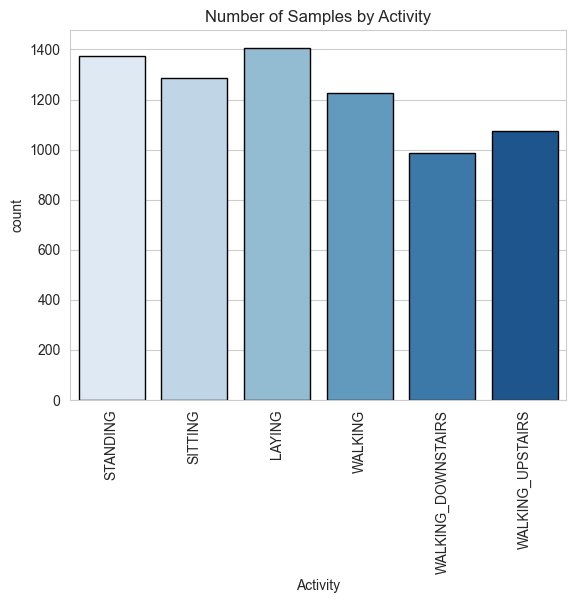

In [5]:
sns.countplot(data=data, x="Activity", palette=PALETTE, edgecolor = "k")
plt.xticks(rotation=90)
plt.title("Number of Samples by Activity");

In [6]:
data

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,tGravityAccmeanX,tGravityAccmeanY,tGravityAccmeanZ,tGravityAccstdX,tGravityAccstdY,tGravityAccstdZ,tGravityAccmadX,tGravityAccmadY,tGravityAccmadZ,tGravityAccmaxX,tGravityAccmaxY,tGravityAccmaxZ,tGravityAccminX,tGravityAccminY,tGravityAccminZ,tGravityAccsma,tGravityAccenergyX,tGravityAccenergyY,tGravityAccenergyZ,tGravityAcciqrX,tGravityAcciqrY,tGravityAcciqrZ,tGravityAccentropyX,tGravityAccentropyY,tGravityAccentropyZ,tGravityAccarCoeffX1,tGravityAccarCoeffX2,tGravityAccarCoeffX3,tGravityAccarCoeffX4,tGravityAccarCoeffY1,tGravityAccarCoeffY2,tGravityAccarCoeffY3,tGravityAccarCoeffY4,tGravityAccarCoeffZ1,tGravityAccarCoeffZ2,tGravityAccarCoeffZ3,tGravityAccarCoeffZ4,tGravityAcccorrelationXY,tGravityAcccorrelationXZ,tGravityAcccorrelationYZ,tBodyAccJerkmeanX,tBodyAccJerkmeanY,tBodyAccJerkmeanZ,tBodyAccJerkstdX,tBodyAccJerkstdY,tBodyAccJerkstdZ,tBodyAccJerkmadX,tBodyAccJerkmadY,tBodyAccJerkmadZ,tBodyAccJerkmaxX,tBodyAccJerkmaxY,tBodyAccJerkmaxZ,tBodyAccJerkminX,tBodyAccJerkminY,tBodyAccJerkminZ,tBodyAccJerksma,tBodyAccJerkenergyX,tBodyAccJerkenergyY,tBodyAccJerkenergyZ,tBodyAccJerkiqrX,tBodyAccJerkiqrY,tBodyAccJerkiqrZ,tBodyAccJerkentropyX,tBodyAccJerkentropyY,tBodyAccJerkentropyZ,tBodyAccJerkarCoeffX1,tBodyAccJerkarCoeffX2,tBodyAccJerkarCoeffX3,tBodyAccJerkarCoeffX4,tBodyAccJerkarCoeffY1,tBodyAccJerkarCoeffY2,tBodyAccJerkarCoeffY3,tBodyAccJerkarCoeffY4,tBodyAccJerkarCoeffZ1,tBodyAccJerkarCoeffZ2,tBodyAccJerkarCoeffZ3,tBodyAccJerkarCoeffZ4,tBodyAccJerkcorrelationXY,tBodyAccJerkcorrelationXZ,tBodyAccJerkcorrelationYZ,tBodyGyromeanX,tBodyGyromeanY,tBodyGyromeanZ,tBodyGyrostdX,tBodyGyrostdY,tBodyGyrostdZ,tBodyGyromadX,tBodyGyromadY,tBodyGyromadZ,tBodyGyromaxX,tBodyGyromaxY,tBodyGyromaxZ,tBodyGyrominX,tBodyGyrominY,tBodyGyrominZ,tBodyGyrosma,tBodyGyroenergyX,tBodyGyroenergyY,tBodyGyroenergyZ,tBodyGyroiqrX,tBodyGyroiqrY,tBodyGyroiqrZ,tBodyGyroentropyX,tBodyGyroentropyY,tBodyGyroentropyZ,tBodyGyroarCoeffX1,tBodyGyroarCoeffX2,tBodyGyroarCoeffX3,tBodyGyroarCoeffX4,tBodyGyroarCoeffY1,tBodyGyroarCoeffY2,tBodyGyroarCoeffY3,tBodyGyroarCoeffY4,tBodyGyroarCoeffZ1,tBodyGyroarCoeffZ2,tBodyGyroarCoeffZ3,tBodyGyroarCoeffZ4,tBodyGyrocorrelationXY,tBodyGyrocorrelationXZ,tBodyGyrocorrelationYZ,tBodyGyroJerkmeanX,tBodyGyroJerkmeanY,tBodyGyroJerkmeanZ,tBodyGyroJerkstdX,tBodyGyroJerkstdY,tBodyGyroJerkstdZ,tBodyGyroJerkmadX,tBodyGyroJerkmadY,tBodyGyroJerkmadZ,tBodyGyroJerkmaxX,tBodyGyroJerkmaxY,tBodyGyroJerkmaxZ,tBodyGyroJerkminX,tBodyGyroJerkminY,tBodyGyroJerkminZ,tBodyGyroJerksma,tBodyGyroJerkenergyX,tBodyGyroJerkenergyY,tBodyGyroJerkenergyZ,tBodyGyroJerkiqrX,tBodyGyroJerkiqrY,tBodyGyroJerkiqrZ,tBodyGyroJerkentropyX,tBodyGyroJerkentropyY,tBodyGyroJerkentropyZ,tBodyGyroJerkarCoeffX1,tBodyGyroJerkarCoeffX2,tBodyGyroJerkarCoeffX3,tBodyGyroJerkarCoeffX4,tBodyGyroJerkarCoeffY1,tBodyGyroJerkarCoeffY2,tBodyGyroJerkarCoeffY3,tBodyGyroJerkarCoeffY4,tBodyGyroJerkarCoeffZ1,tBodyGyroJerkarCoeffZ2,tBodyGyroJerkarCoeffZ3,tBodyGyroJerkarCoeffZ4,tBodyGyroJerkcorrelationXY,tBodyGyroJerkcorrelationXZ,tBodyGyroJerkcorrelationYZ,tBodyAccMagmean,tBodyAccMagstd,tBodyAccMagmad,tBodyAccMagmax,tBodyAccMagmin,tBodyAccMagsma,tBodyAccMagenergy,tBodyAccMagiqr,tBodyAccMagentropy,tBodyAccMagarCoeff1,tBodyAccMagarCoeff2,tBodyAccMagarCoeff3,tBodyAccMagarCoeff4,tGravityAccMagmean,tGravityAccMagstd,tGravityAccMagmad,tGravityAccMagmax,tGravityAccMagmin,tGravityAccMags